# Error Functions Applied MSE

Vamos a reproducir la misma red que creamos en 01

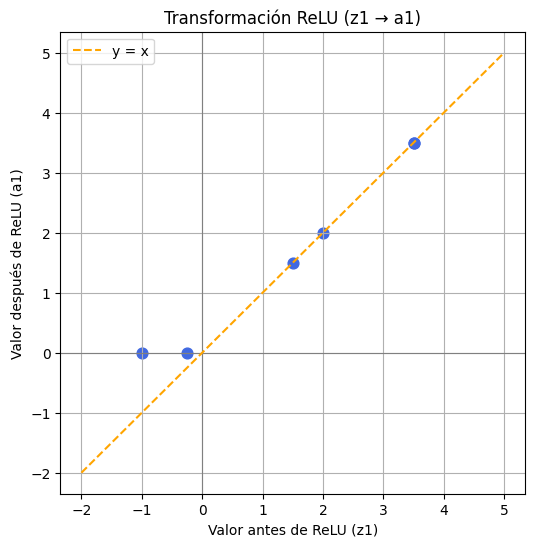

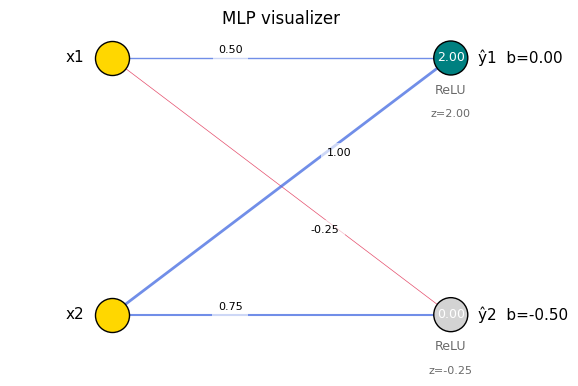

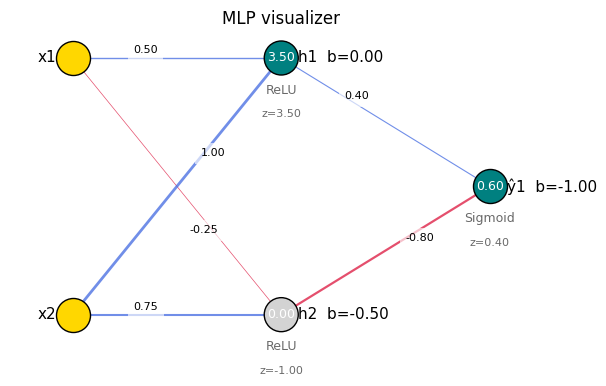

In [1]:
# Preparación
import torch
torch.manual_seed(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

# === 1. Datos de entrada (features) ===
# Cada fila de X es una MUESTRA (un ejemplo del conjunto de datos)
# Cada columna de X es una FEATURE (una característica numérica por ejemplo)
# En este caso: 3 muestras, 2 features por muestra.
X = torch.tensor([
    [2.0, 1.0],   # muestra 1: x1=2.0, x2=1.0
    [5.0, 1.0],   # muestra 2: x1=5.0, x2=1.0
    [1.0, 3.0]    # muestra 3: x1=1.0, x2=3.0
], device=device)

# === 2. Tensores de pesos y bias (definidos manualmente) ===
# Cada fila de W1 representa una neurona (out_features)
# Cada columna de W1 representa una conexión desde una feature de entrada
W1 = torch.tensor([
    [0.5,  1.0],     # Neurona 1: pesos para feature1 y feature2
    [-0.25, 0.75]    # Neurona 2: pesos para feature1 y feature2
], device=device)

b1 = torch.tensor([
    0.0,   # Bias de la neurona 1
    -0.5   # Bias de la neurona 2
], device=device)


# === 3. Crear la capa lineal (estructura de la capa de Neuronas) ===
# - in_features = número de columnas de X (features)
# - out_features = número de neuronas en la capa
layer1 = nn.Linear(in_features=2, out_features=2, bias=True, device=device)

# === 4. Copiar manualmente los pesos y bias definidos arriba ===
with torch.no_grad():
    layer1.weight.copy_(W1)
    layer1.bias.copy_(b1)

# === 5. Comprobación de la estructura de la capa ===


# === 6. Feedforward: aplicar la capa a las muestras ===
z1 = layer1(X)  # PyTorch realiza z = X @ W1.T + b1


# === 7. Feedforward: Aplicar función de activación (ReLU) ===
a1 = torch.relu(z1)



#==============================================================
# === 8. Comprobaciones (no necesarias para el proceso) ===
assert a1.shape == z1.shape
assert torch.all(a1 >= 0), "ReLU anula negativos"


# === Comparación visual: valores antes y después de ReLU ===



import matplotlib.pyplot as plt

# Convertimos a CPU para asegurar compatibilidad con matplotlib
z1_cpu = z1.detach().cpu()
a1_cpu = a1.detach().cpu()

plt.figure(figsize=(6, 6))
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

# Dibujamos puntos: z1 → a1
plt.scatter(z1_cpu, a1_cpu, color='royalblue', s=60)

# Línea identidad para mostrar dónde ReLU deja pasar los positivos
plt.plot([-2, 5], [-2, 5], color='orange', linestyle='--', label='y = x')

plt.title("Transformación ReLU (z1 → a1)")
plt.xlabel("Valor antes de ReLU (z1)")
plt.ylabel("Valor después de ReLU (a1)")
plt.legend()
plt.grid(True)
plt.show()

import importlib, mlp_viz
importlib.reload(mlp_viz)
from mlp_viz import draw, draw_dense, draw_layer

draw([layer1, "ReLU"], sample=X[0], show_node_values=True)

# === 9. Capa de salida (1 neurona) ===
# in_features=2 porque recibe a1 (2 activaciones de la capa oculta layer1)
# out_features=1 porque queremos una salida escalar
import torch.nn as nn

W2 = torch.tensor([[0.4, -0.8]], device=device)  # (1, 2) → una neurona, dos entradas (h1,h2)
b2 = torch.tensor([-1.0], device=device)          # (1,)

layer2 = nn.Linear(in_features=2, out_features=1, bias=True, device=device)
with torch.no_grad():
    layer2.weight.copy_(W2)
    layer2.bias.copy_(b2)



# === 10. Feedforward salida: z2 = a1 @ W2^T + b2 ===

#Conectamos la capa de salida a la activación de la capa oculta layer1
z2 = layer2(a1)

# === 11. Activación de salida ===
# Si REGRESIÓN → normalmente lineal (sin activación): a2 = z2 
# Tambien podría usarse ReLU si queremos salida no negativa o leakly ReLU
# Si CLASIFICACIÓN BINARIA → Sigmoid:

#en este caso haremos clasificación binaria
a2 = torch.sigmoid(z2)


# === 12. Visual: arquitectura completa y valores para una muestra ===
from mlp_viz import draw

draw([layer1, "ReLU", layer2, "Sigmoid"], sample=X[1], show_node_values=True)




Ahora si, vamos a calcular el error usando MSE (Mean Squared Error)

In [ ]:
# === 13. Pérdida MSE ===
import torch.nn.functional as F

# Tenemos a2 (predicciones de la red que acabamos de calcular arriba)
# que en nuestro caso son un valor entre 0 y 1 (por la Sigmoid)
# un porcentaje de pertenencia a la clase positiva (1)


# Necesitamos definir las salidas verdaderas o etiquetas reales 
# (nos las inventamos en este caso) representan también un valor entre 0 y 1
y_true = torch.tensor([[0.0], [1.0], [0.0]], device=device)

# Cálculo de la pérdida MSE manualmente
# Restamos las preds de las etiquetas reales
mse_manual = ((a2 - y_true) ** 2).mean()

# Pérdida con PyTorch
mse_fn = nn.MSELoss()
mse_torch = mse_fn(a2, y_true)

print("MSE manual :", mse_manual.item())
print("MSE PyTorch:", mse_torch.item())
assert torch.isclose(mse_manual, mse_torch)

# Mostramos predicciones vs. verdad
print("\nPredicciones (a2) vs. etiquetas reales (y_true):")
for i in range(len(y_true)):
    print(f"  muestra {i+1}:  pred = {a2[i].item():.3f}   real = {y_true[i].item():.1f}")


MSE manual : 0.15327230095863342
MSE PyTorch: 0.15327230095863342

Predicciones (a2) vs. etiquetas reales (y_true):
  muestra 1:  pred = 0.450   real = 0.0
  muestra 2:  pred = 0.599   real = 1.0
  muestra 3:  pred = 0.310   real = 0.0
